# NYC Taxi Data Study Jan 1 2016 to June 31 2016 (pickup)
# Autocorrelation Analysis of Company 1 & 2
## created by Marcus
## last edit: 

### based on dataset: train.csv

In [1]:
import pandas as pd 
import numpy as np
#import datetime as dt

import matplotlib.pyplot as plt
import os
from pandas.plotting import autocorrelation_plot

%matplotlib inline

In [2]:
#Checks to see if a requested file can be found.
def FileCheck(fn):
    try:
      open(fn, "r")
      return 1
    except IOError:
      print ("Error: File does not appear to exist.")
      return 0


In [3]:
# Open the original data file from csv file.  

#--------------------------------------------------------------# 
#Ensure that this notebook is in the same folder as the orginal taxi cab data csv or zip file
#---------------------------------------------------------------#

#nyc_csv = '/Users/alexandraagostino/Desktop/Fdn of Data Science/Group Project/nyc_taxi_train.csv'

# show numbers as float not scientific notation for funtions like describe
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# using the relpath should allow this file to open on mac and windows computers without trouble.

# Source data csv file to be opened.
# the file has the same name as the uncompresses NYC taxi data.

file_name = "train.csv"
fields = ['pickup_datetime','vendor_id']
dframe = 'df_pickup'

# Try to open the file
try:
    file_path = os.path.relpath(file_name)

    with open(file_path, "rb") as f:
        df_pickup = pd.read_table(f, sep=",", usecols=fields)
        f.close()

# Give feedback if the file can't be found.        
except:
    FileCheck(file_path )



In [4]:
# Convert pickup to datetime objects and reduce counts and duration to save memory
def convData(data):
    data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

#Run the function and create the time objects   
convData(df_pickup)

# add a one column for counts.  This is needed for the resample sums 
df_pickup['constant'] = np.ones(( len(df_pickup), ))

# downcast the ones from float to int to save memory
df_pickup.constant = df_pickup.constant.astype(int)



In [5]:
# need to explicitly set the new datetime index as a DatetmeIndex object
df_pickup = df_pickup.set_index(pd.DatetimeIndex(df_pickup['pickup_datetime']))

# del the date object from the df.  It is now the index so it is not needed and slows processing time.
del df_pickup['pickup_datetime']     


## Autocorrelations

In [6]:
from statsmodels.graphics.tsaplots import plot_acf

/home/marcus/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
# funtion to plot autocorrelations
def autocorrPlot(resamp,lag, vendor):
    """ Plot an autocorrelation 
    arg:
    resamp: timeframe of the resamples
    lag: number of periods to show on plot
    vendor: which vendor is being plotted
    Title is generated by arguments"""
    
    df_resample = df_pickup[df_pickup['vendor_id'] == vendor]
    
    
    titl = "Autocorrelation in {} period size for vendor no. {}".format(resamp, vendor)
    df_resample = df_resample.resample(resamp).sum()
    plot_acf(df_resample['constant'],lags = lag, title=titl)
    
    #plt.rcParams['figure.figsize'] = 12,5

    plt.show()
    del df_resample
    

#"""Confidence intervals are drawn as a cone. By default, 
#this is set to a 95% confidence interval, suggesting that 
#correlation values outside of this code are very likely a 
#correlation and not a statistical fluke.
#"""

## Run plots at increasing invervals to look for time-based patterns

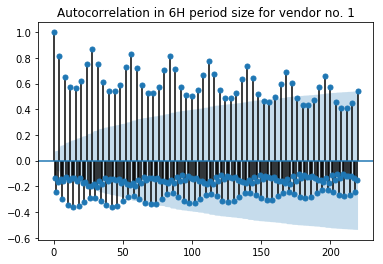

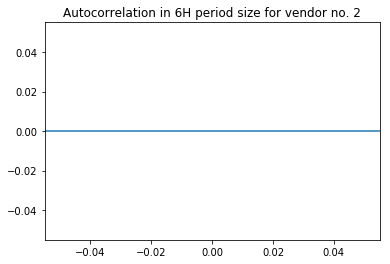

In [15]:
# 6H intervals
autocorrPlot('6H',220,1)
autocorrPlot('6H',220,2) # Something wrong at 6H. Missing data or not enough.  Not critial in the overall review.

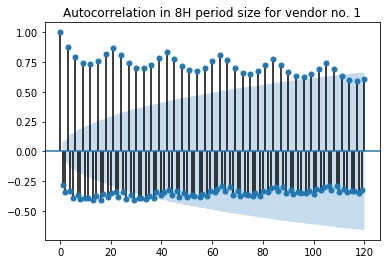

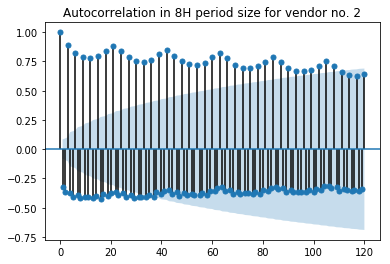

In [9]:
# 8H intervals
autocorrPlot('8H',120,1)
autocorrPlot('8H',120,2)

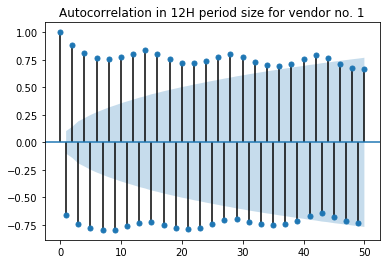

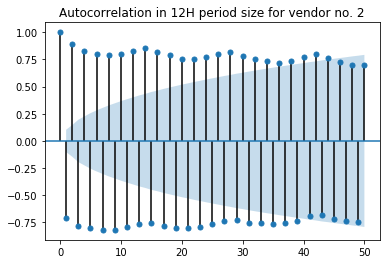

In [10]:
# 12H intervals
autocorrPlot('12H',50,1)
autocorrPlot('12H',50,2)

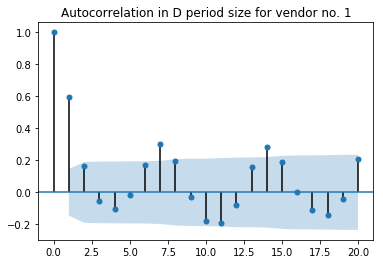

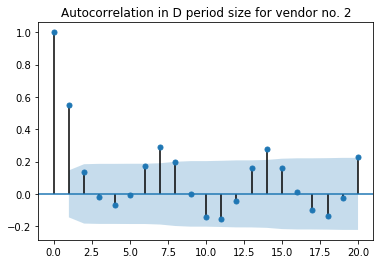

In [11]:
# 1 day intervals
autocorrPlot('D',20,1)
autocorrPlot('D',20,2)

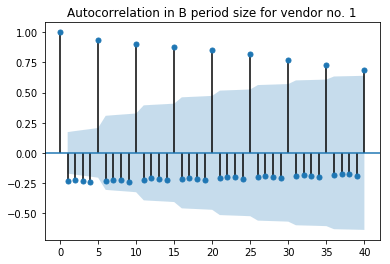

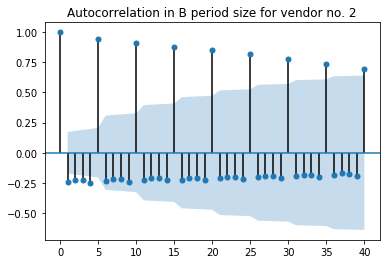

In [17]:
# business days only  intervals
autocorrPlot('B',40,1)
autocorrPlot('B',40,2)

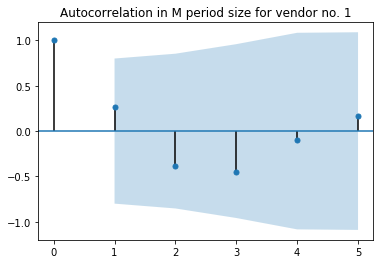

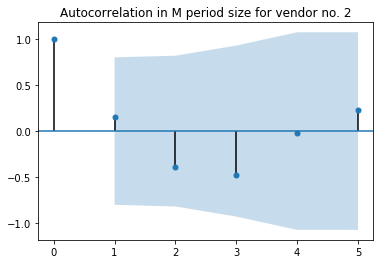

In [13]:
# month only  intervals
autocorrPlot('M',5,1)
autocorrPlot('M',5,2)

## Conclusions
There are multiple time-based or seasonal patterns of service by cab users in NCY.
Green and yellow companies compete evenly in all of the period intervals reviewed.
Travel on business days(weekdays) is very consistent.  Morning & evening drive patterns are as regular as night follows day.
Mondays' Wednesday' and Friday and the most consistent days of travel.
Weekend travel is less predictable.

This makes scheduling and resourcing for companies easier because you can count on the same volume on the same days at the same time for 5 out of 7 days.
